Praktikum Digitale Signalverarbeitung
=====================================

**Author:** Johann-Markus Batke

**Date:** <2024-05-03 Fr>



## Vorbereitung



Ziel dieses Versuchs ist es, ein beliebiges Signal mit Hilfe einer Raumimpulsantwort zu verhallen (aka Faltungshall). Die Wahl des Signals bzw. der Raumimpulsantwort ist beliebig, muss aber vor Durchführung des Praktikums erfolgen. 

1.  Beschaffen Sie sich eine oder mehrere Raumimpulsantworten als
    wav-Datei. Einige mögliche Beschaffungsquellen sind:
    -   [https://www.lieuxperdus.com/convolver/download/](https://www.lieuxperdus.com/convolver/download/)
    -   [http://isophonics.net/content/room-impulse-response-data-set](http://isophonics.net/content/room-impulse-response-data-set)
    -   [http://www.cksde.com/p_6_250.htm](http://www.cksde.com/p_6_250.htm)

2.  Beschaffen Sie einen geeigneten Stimulus wie Sprache oder Musik als
    wav-Datei. Sie können die Sprachdatei aus dem vergangenen
    Praktikumsversuchen verwenden.

3.  Wie lang ist das Faltungsergebnis, wenn die gefalteten Folgen die
    Längen $L = 17$ und $P = 9$ besitzen?

4.  Welche Ordnung $N$ für eine DFT ist mindestens zu wählen, damit die
    Berechnung der zyklischen Faltung durch Multiplikation im
    Frequenzbereich (also eine "Schnelle Faltung") der linearen Faltung
    entspricht? Geben Sie das Ergebnis mithilfe der Längen $L$ und $P$
    der gefalteten Folgen an!

5.  Es wird eine Schnelle Faltung mit $N=512$ Punkten berechnet. Die
    Längen der gefalteten Folgen sind $L = 400$ Punkte und $P=200$
    Punkte. Wieviele Punkte des Faltungsergebnisses entsprechen der
    linearen Faltung?



In [1]:
# libraries importieren
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav # zum Lesen von WAV-Dateien
import sounddevice as sd # zum Abspielen von Audiodateien

# aufgabe 1
RIA = "./raumImpuls.wav"

# aufgabe 2
sprachStim = "./digisig.wav"

# aufgabe 3
L = 17
P = 9
def faltungslaenge(x, y):
    return x + y - 1
print("Faltungslaenge: ", faltungslaenge(L, P))
# Faltungslaenge:  25

#aufgabe 4
#da Faltungslänge 25 ist,  muss N >= 25 sein

# aufgabe 5 
L_1      = 400
P_1      = 200
N        = 512

falt     = L_1 + P_1 - 1
punkt    = falt - N
ergebnis = N - (punkt * 2)

print("Ergebnis: ", ergebnis)

Faltungslaenge:  25
Ergebnis:  338


## Versuchsdurchführung



### Raumimpulsantwort



Die Raumimpulsantwort (RIA) ist charakteristisch für die akustischen Verhältnisse eines Raumes.

1.  Laden Sie die RIA aus der Wav-Datei in eine Variable,
    stellen Sie den Zeitverlauf dar. Beachten Sie die Abtastrate, mit
    der die Raumimpulsantwort gespeichert wurde.

2.  Normieren Sie die RIA auf den Maximalwert (d.h. der neue
    Maximalwert im Signal ist 1).

3.  Implementieren Sie die Wiedergabe des Signals unter Python. Hören
    Sie sich die RIA an und machen Sie sich einen Eindruck von den
    akustischen Verhältnissen in dem Raum, wo die Aufnahme erfolgte!
    Zur Wiedergabe des Signals in einem Notebook können Sie auf Ihre
    Kenntnisse aus Versuch PDS 1 zurückgreifen.



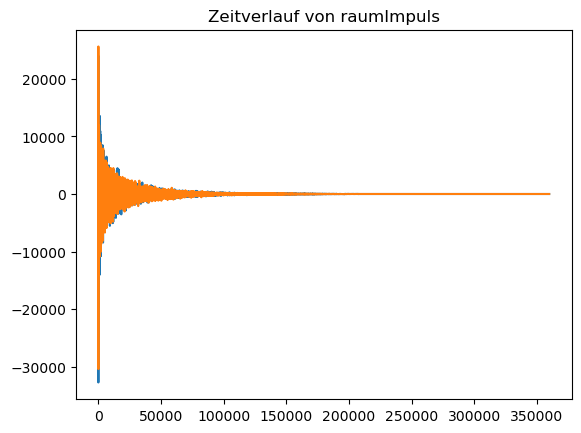

rate:  48000


In [2]:
# aufgabe 1 
# zeitverlauf von raumImpuls
rate, data = wav.read(RIA)
plt.plot(data)
plt.title("Zeitverlauf von raumImpuls")
plt.show()
print("rate: ", rate)

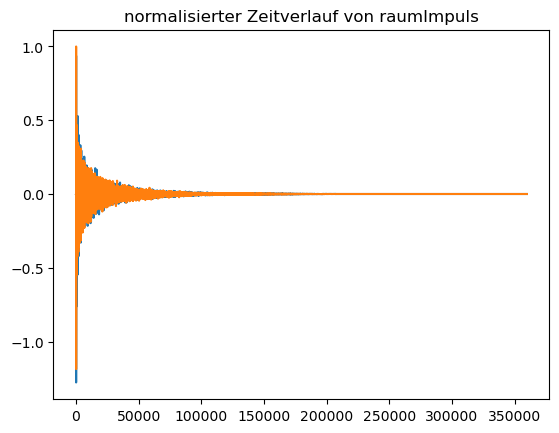

In [3]:
#Aufgabe 2 Normieren Sie die RIA auf den Maximalwert (d.h. der neue Maximalwert im Signal ist 1).
max_value = data.max()
normalized_data = data / max_value

plt.plot(normalized_data)
plt.title("normalisierter Zeitverlauf von raumImpuls")
plt.show()

In [4]:
# aufgabe 3 Implementieren Sie die Wiedergabe des Signals unter Python. Hören Sie sich die RIA an und machen Sie sich einen Eindruck von den akustischen Verhältnissen in dem Raum, wo die Aufnahme erfolgte!
sd.play(normalized_data, rate)

### Stimulus



Verfahren Sie genauso wie für die Raumimpulsantwort mit dem Stimulus, der verhallt werden soll.

Die Abtastrate von RIA und Stimulus müssen übereinstimmen. Ist dies nicht der Fall, können Sie mit Hilfe einer DAW (z.B. Audacity) oder unter Verwendung von Python die Abtastrate umsetzen. Für Python bietet das Modul Scipy den Befehl `scipy.signal.resample_poly` an. 



C:\Users\renti\AppData\Local\Temp\ipykernel_8112\1316956114.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate_sp, data_sp = wav.read(sprachStim)


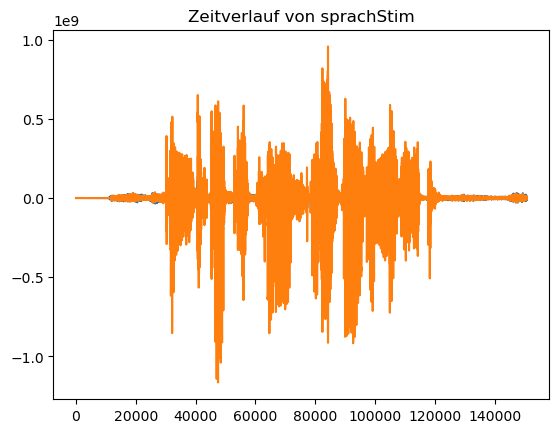

rate:  44100


In [5]:
import scipy.signal as sig
# aufgabe 1 
# zeitverlauf von sprachStim
rate_sp, data_sp = wav.read(sprachStim)
plt.plot(data_sp)
plt.title("Zeitverlauf von sprachStim")
plt.show()
print("rate: ", rate_sp)



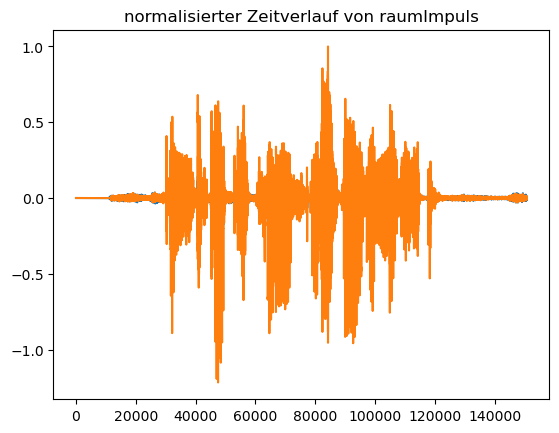

In [6]:
#aufgabe 2 Normieren Sie die SprachStim auf den Maximalwert (d.h. der neue Maximalwert im Signal ist 1).
max_value_sp = data_sp.max()
normalized_data_sp = data_sp / max_value_sp

plt.plot(normalized_data_sp)
plt.title("normalisierter Zeitverlauf von raumImpuls")
plt.show()


# Set the sample rate of sprachStim to 48000
sprachStim = sig.resample_poly(normalized_data_sp, rate, rate_sp)

In [7]:
# aufgabe 3 implementieren Sie die Wiedergabe des Signals unter Python. Hören Sie sich die SprachStim an und machen Sie sich einen Eindruck von den akustischen Verhälältnissen in dem Raum, wo die Aufnahme erfolgte!
sd.play(normalized_data_sp, rate_sp)

### Faltung



Die Faltung kann mit Hilfe des Befehls `np.convole` durchgeführt werden. Achtung: es ist notwendig, dass die zu faltenden Signale vorab auf Eins normiert werden, da es sonst zu Verzerrungen kommt (Stand Python 3.10).

1.  Berechnen Sie vor dem Falten die Größe des Ausgangssignals und
    initialisieren Sie die Variable mit Nullen!

2.  Hören Sie sich das Signal an! Entsteht der erwartete Raumeindruck?

*Anmerkung:* Sofern Sie ein Stereopaar RIR zur Verfügung haben, können Sie das Eingangssignal getrennt für den linken und rechten Stereokanal falten. Die Faltung muss dann per Schleife mehrfach aufgerufen werden.



In [8]:
#größe des ausgangssignals
len_data = len(normalized_data) + len(normalized_data_sp) -1
laenge   = np.zeros((len(normalized_data[:,0]) + len(normalized_data_sp[:,0]) -1,2))

print("Laenge: ", len_data)
print("Laenge: ", laenge)


Laenge:  510657
Laenge:  [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Faltungssignal:  [[ 3.78956126e-16 -6.00888236e-16  4.49305786e-16]
 [-2.84217094e-16 -9.58175773e-16  6.17115260e-16]
 [-4.54747351e-16 -2.27373675e-16 -2.27373675e-16]
 ...
 [-1.82372636e-16  2.06105246e-07  2.00149773e-07]
 [-7.22385115e-17  2.83369942e-07  2.66118889e-07]
 [ 5.70802664e-16 -2.04101831e-16  1.73311646e-16]]
neuFalt:  [[ 3.78956126e-16]
 [-6.00888236e-16]
 [ 4.49305786e-16]
 ...
 [ 5.70802664e-16]
 [-2.04101831e-16]
 [ 1.73311646e-16]]


<StemContainer object of 3 artists>

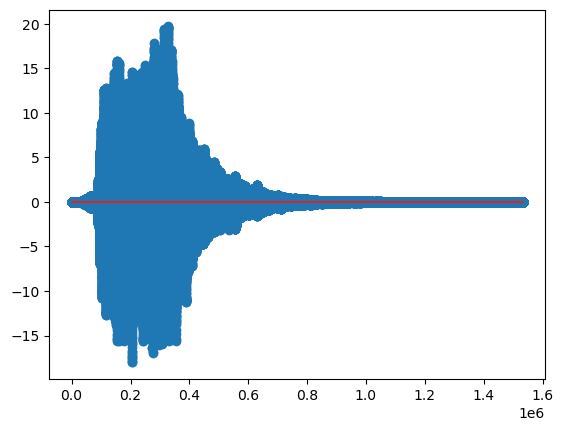

In [17]:
# faltungsschleife intialisieren
faltSignal = sig.fftconvolve(normalized_data, normalized_data_sp)
print("Faltungssignal: ", faltSignal)
neuFalt    = faltSignal.reshape(len(faltSignal)*3, 1)
print("neuFalt: ", neuFalt)
plt.stem(neuFalt)

In [19]:
sd.play(neuFalt, rate)